In [45]:
from pathlib import Path

PROJECT_ROOT = Path(r"C:\FYP\PROJECT")

AUDIO_PREPROC_ROOT = PROJECT_ROOT / "product" / "audio_preprocessing"

AUDIO_DIR = AUDIO_PREPROC_ROOT / "data" / "ESC-50" / "audio"     
META_CSV = AUDIO_PREPROC_ROOT / "data" / "ESC-50" / "meta" / "esc50.csv"
WAVEFORM_OUT = AUDIO_PREPROC_ROOT / "outputs" / "waveforms"
SPEC_OUT = AUDIO_PREPROC_ROOT / "outputs" / "spectrograms"

WAVEFORM_OUT.mkdir(parents=True, exist_ok=True)
SPEC_OUT.mkdir(parents=True, exist_ok=True)

print("AUDIO_DIR     =", AUDIO_DIR)
print("META_CSV      =", META_CSV)
print("WAVEFORM_OUT  =", WAVEFORM_OUT)
print("SPEC_OUT      =", SPEC_OUT)




AUDIO_DIR     = C:\FYP\PROJECT\product\audio_preprocessing\data\ESC-50\audio
META_CSV      = C:\FYP\PROJECT\product\audio_preprocessing\data\ESC-50\meta\esc50.csv
WAVEFORM_OUT  = C:\FYP\PROJECT\product\audio_preprocessing\outputs\waveforms
SPEC_OUT      = C:\FYP\PROJECT\product\audio_preprocessing\outputs\spectrograms


In [46]:
# Imports & Setup
import librosa, librosa.display
import matplotlib.pyplot as plt
import numpy as np
import os

OUTPUT_WAVEFORMS = Path("outputs") / "waveforms"
OUTPUT_WAVEFORMS.mkdir(parents=True, exist_ok=True)
SAMPLE_FILES = ["1-100032-A-0.wav", "1-100038-A-14.wav"]  # random files from ESC-50 dataset




In [47]:
for f in SAMPLE_FILES:
    path = AUDIO_DIR / f
    print("Looking for:", path, "exists?", path.exists())


Looking for: C:\FYP\PROJECT\product\audio_preprocessing\data\ESC-50\audio\1-100032-A-0.wav exists? True
Looking for: C:\FYP\PROJECT\product\audio_preprocessing\data\ESC-50\audio\1-100038-A-14.wav exists? True


Loading: C:\FYP\PROJECT\product\audio_preprocessing\data\ESC-50\audio\1-137-A-32.wav
Saved waveform image to: C:\FYP\PROJECT\product\audio_preprocessing\outputs\waveforms\sample_waveforms.png


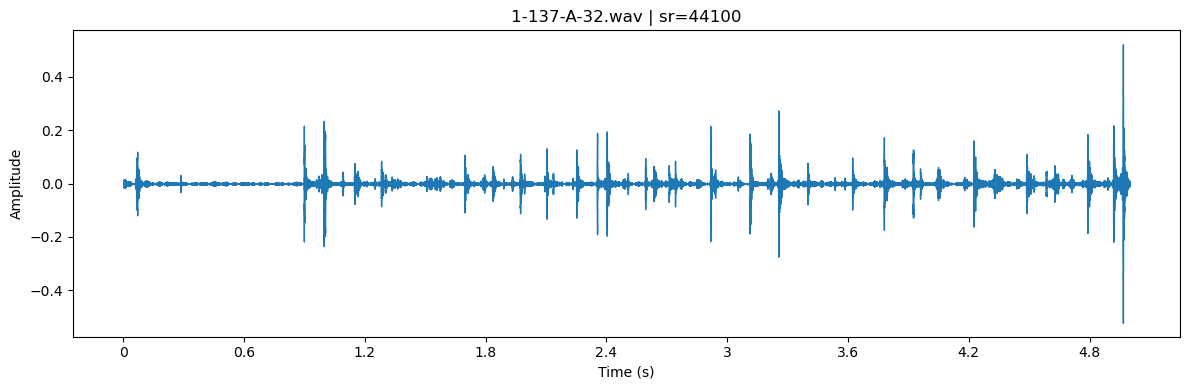

In [52]:
import librosa
import librosa.display
import matplotlib.pyplot as plt


SAMPLE_FILES = [
    "1-137-A-32.wav",   
    
]

plt.figure(figsize=(12, 4 * len(SAMPLE_FILES)))

for i, f in enumerate(SAMPLE_FILES):
    wav_path = AUDIO_DIR / f  # absolute path to the .wav
    print("Loading:", wav_path)

    y, sr = librosa.load(wav_path, sr=None)

    plt.subplot(len(SAMPLE_FILES), 1, i + 1)
    librosa.display.waveshow(y, sr=sr)
    plt.title(f"{f} | sr={sr}")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")

plt.tight_layout()

out_path = WAVEFORM_OUT / "sample_waveforms.png"
plt.savefig(out_path, dpi=150, bbox_inches="tight")
print("Saved waveform image to:", out_path)
plt.show()


In [49]:
# Load and Inspect Audio
for f in SAMPLE_FILES:
    path = os.path.join(AUDIO_DIR, f)
    y, sr = librosa.load(path, sr=None)  # sample rate preserved

    duration = librosa.get_duration(y=y, sr=sr)
    print(f"File: {f}")
    print(f"Sampling rate: {sr} Hz")
    print(f"Duration: {duration:.2f} sec")
    print(f"Amplitude range: {np.min(y):.3f} to {np.max(y):.3f}\n")


File: 1-100032-A-0.wav
Sampling rate: 44100 Hz
Duration: 5.00 sec
Amplitude range: -0.968 to 0.999

File: 1-100038-A-14.wav
Sampling rate: 44100 Hz
Duration: 5.00 sec
Amplitude range: -0.480 to 0.546



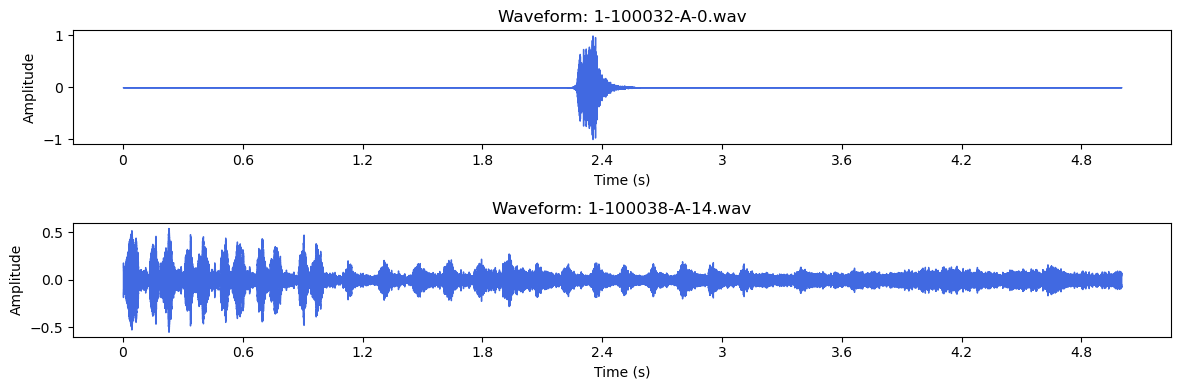

In [50]:
#plot waveforms
plt.figure(figsize=(12, 4))
for i, f in enumerate(SAMPLE_FILES, 1):
    path = os.path.join(AUDIO_DIR, f)
    y, sr = librosa.load(path, sr=None)
    plt.subplot(len(SAMPLE_FILES), 1, i)
    librosa.display.waveshow(y, sr=sr, color='royalblue')
    plt.title(f"Waveform: {f}")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()


Trimmed 210772 samples of silence


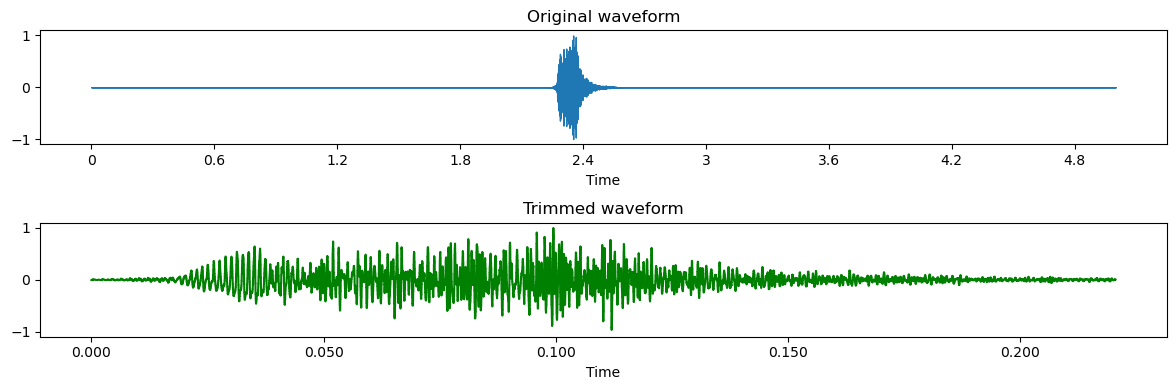

In [51]:
f = SAMPLE_FILES[0]
path = os.path.join(AUDIO_DIR, f)
y, sr = librosa.load(path, sr=None)

y_trimmed, index = librosa.effects.trim(y, top_db=25)
print(f"Trimmed {len(y) - len(y_trimmed)} samples of silence")

# Plot before and after trimming
plt.figure(figsize=(12, 4))
plt.subplot(2, 1, 1)
librosa.display.waveshow(y, sr=sr)
plt.title("Original waveform")

plt.subplot(2, 1, 2)
librosa.display.waveshow(y_trimmed, sr=sr, color='green')
plt.title("Trimmed waveform")
os.makedirs("product/audio_preprocessing/outputs/waveforms", exist_ok=True)
plt.savefig("product/audio_preprocessing/outputs/waveforms/sample_waveforms.png", dpi=150, bbox_inches="tight")
plt.tight_layout()
plt.show()


In [21]:
plt.savefig("product/audio_preprocessing/outputs/waveforms/sample_waveforms.png", dpi=150, bbox_inches="tight")


<Figure size 640x480 with 0 Axes>

In [22]:
os.makedirs("product/audio_preprocessing/outputs/waveforms", exist_ok=True)

